<a href="https://colab.research.google.com/github/ferjorosa/learn-pymc/blob/main/Probabilistic%20Porgramming%20For%20Hackers/Chapter%201%20-%20Introduction/text_message_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are given a dataset with the average number of messages sent by a person. Our objective is to understand if there has been a gradual or sudden change in the text-mes

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/ferjorosa/learn-pymc/main/Probabilistic%20Porgramming%20For%20Hackers/Chapter%201%20-%20Introduction/data/msg_data.csv")
print(df.shape)

(74, 1)


Text(0.5, 1.0, "Did the user's texting habits change over time?")

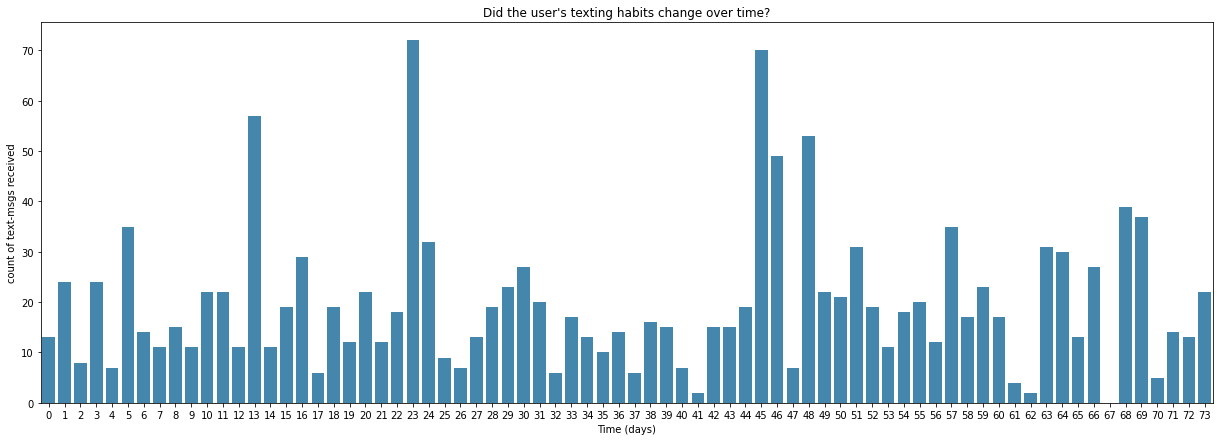

In [13]:
var_x = np.arange(df.shape[0])
var_y = "day_msgs"

fig, ax = plt.subplots(figsize=(21,7))
sns.barplot(ax=ax, data=df, x=var_x, y=var_y, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")

We see that around day 42 there may be a slight increase in the number of messages received. However, we need to prove this. In order to do it, we are going to model the distribution of messages over the recorded period of time.



In [11]:
import pymc3 as pm

count_data = df["day_msgs"]
n_count_data = df.shape[0]

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

In [14]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [15]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

In [16]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step, return_inferencedata=False)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]


Sampling 2 chains for 5_000 tune and 10_000 draw iterations (10_000 + 20_000 draws total) took 12 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [17]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

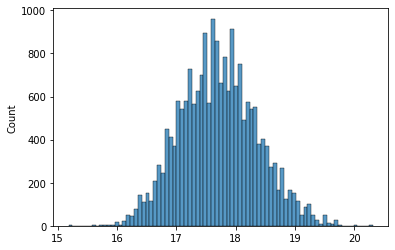

In [21]:
sns.histplot(lambda_1_samples)

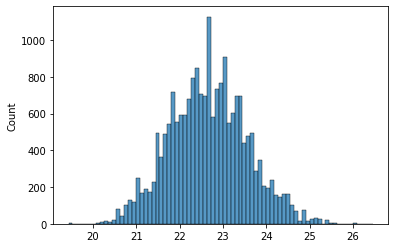

In [22]:
sns.histplot(lambda_2_samples)

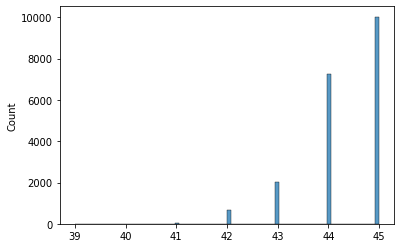

In [23]:
sns.histplot(tau_samples)

In [24]:
tau_samples

array([44, 44, 44, ..., 45, 45, 45])